# Classification

The concept of classification comes from the fact that we are dealing with binary systems like 0, 1 or a system which has targets that are labeled as 1, 2, 3 or we like to study the systems which the target have different types such as yes/no or click/don't click. So target can include different classes as an example click is a class in click/don't click.

In *classification* we predict two things: 

    1- The class of the target
    2- The probability that a class of a target can occur. 

Here, we need to define a cutoff probability which can be used to estimate the class probability. If the class probability is below the cutoff probability then we accept the estimated probability otherwise we need to assign the new value to the class of interest. 

In multiclass classification we can face with two different predicitons:

    1- Predict if the class is 1, or 2.
    2- Given the class is greater than 1, predict if the class belongs to 0 or 2 (*conditional* probability)

Let's dive into a couple of definitions:

    1- Conditional Probability:
    The probability of an incident based on previous event.
    
    2- Covariance:
    Is the strength of correlation between two variables.   
    

### Naive Bayes
In *Naive Bayes* classification there is a ssumption which the features are independent from each others and they are not correlated which is a naive assupmtion :-) 
For example if we are talking about a flower, the features are the length, width and the color of the flower. If we want to predict the existence of a specific flower in a bag of flowers the features are independently contribute to the probability which the flower is going to be a rose (for example).

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [3]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [4]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 0


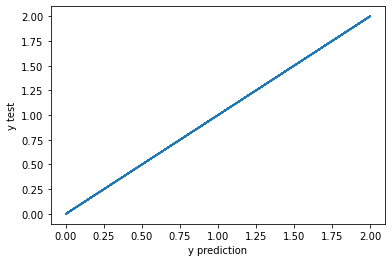

In [10]:
plt.plot(y_test, y_pred)
plt.xlabel('y prediction')
plt.ylabel('y test')
plt.show()

### Discriminant Analysis

This method is a classification algorithm that finds the most discriminative axes between the classes. The axes is used to build a hyperplane which the data is going to be projected on and it keeps the classes as far apart as possible. This method is also called *LDA*.

In [13]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]


### Logistic Regression

In contrast with *linear regression*, *logistic regression* deals with classification problems. This model is also called *Logit Regression*. This model predicts the class of the feature based on its predicted probability. If we consider the binary system and we define the threshold as 0.5 if any predicted probability is greater than 0.5 then the class of the object is 1 otherwise is 0. 

In [10]:
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt

iris = datasets.load_iris()

x = iris['data'][:,3:] # petal width
y = []

for i in iris['target']: # 1 if iris-virginica, else 0
    if i == 2:
        y.append(1)
    elif i !=2:
        y.append(0)

In [71]:
y2 = np.asarray(y)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)
print('The accuracy score is:', log_reg.score(x, y))

The accuracy score is: 0.96


Now let's look at the x values which are between 0 and 3 meaning the petal width is in this range. 

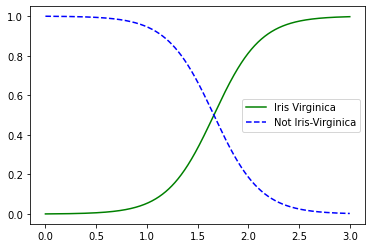

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(["Iris Virginica","Not Iris-Virginica"])

From the plot above it shows that the values above x > 1.5 are predicted as "Iris Virginica" and below it are predicted as not "Iris Virginica".

In [12]:
from sklearn import metrics
import seaborn as sns

y_pred = log_reg.predict(x)
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

[[98  2]
 [ 4 46]]


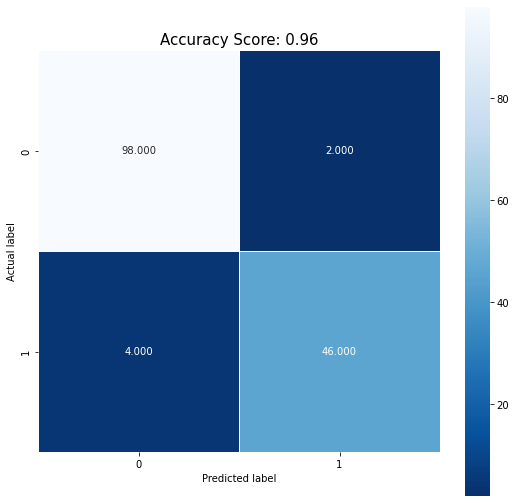

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log_reg.score(x, y))
plt.title(all_sample_title, size = 15);

From above we can see that the 98 of samples are correctly predicted as 0, and 46 correctly predicted as 1. 

In [33]:
y_proba = log_reg.predict_log_proba(x)[:,1]

y_proba

array([-6.32987523, -6.32987523, -6.32987523, -6.32987523, -6.32987523,
       -5.46571276, -5.89753291, -6.32987523, -6.32987523, -6.76255678,
       -6.32987523, -6.32987523, -6.76255678, -6.76255678, -6.32987523,
       -5.46571276, -5.46571276, -5.89753291, -5.89753291, -5.89753291,
       -6.32987523, -5.46571276, -6.32987523, -5.03469545, -6.32987523,
       -6.32987523, -5.46571276, -6.32987523, -6.32987523, -6.32987523,
       -6.32987523, -5.46571276, -6.76255678, -6.32987523, -6.32987523,
       -6.32987523, -6.32987523, -6.76255678, -6.32987523, -6.32987523,
       -5.89753291, -5.89753291, -6.32987523, -4.6049105 , -5.46571276,
       -5.89753291, -6.32987523, -6.32987523, -6.32987523, -6.32987523,
       -1.40871026, -1.09990219, -1.09990219, -1.75213643, -1.09990219,
       -1.75213643, -0.83257494, -2.91722476, -1.75213643, -1.40871026,
       -2.91722476, -1.09990219, -2.91722476, -1.40871026, -1.75213643,
       -1.40871026, -1.09990219, -2.91722476, -1.09990219, -2.51

y_proba is a matrix of two column data which the first column is the probablity of class 0 and the second one is the probablity of the class 1

Now we can plot the ROC curve which stands for *receiver operating characterstic* (ROC) curve. This shows the variation of *true positive rate* vs *false positive rate*. 

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_proba)

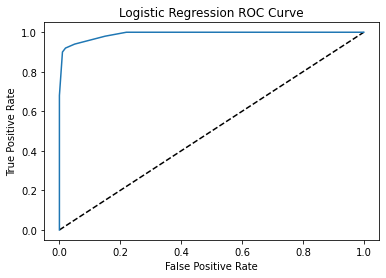

In [40]:
plt.plot([0, 1], 'k--')
plt.plot(fpr, tpr, label = 'logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()